**AI Lab Assignment: Regression Models**

Loss function: Loss(Beta) = 1/n*sum(1, n)(y(i) - f(x(i))^2)

**Part 1: Selecting the Target Variable** <br>
We are going to select the IMDB_Rating as our target variable because it is the primary metric by which movies are evaluated on IMDb.

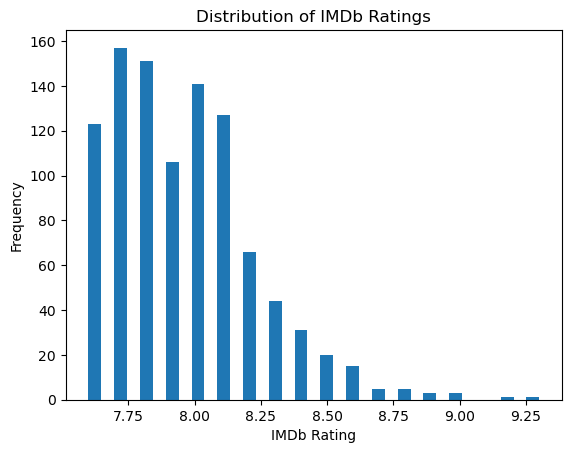

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Gross_norm,Genre_enc,Certificate_enc,Movie_Age,Rating_Votes_Ratio,Gross_per_Vote,Votes_per_Year,Runtime_per_Rating,Decade,Primary_Genre
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,0.030257,137,1,31.0,0.000004,12.095658,73222.187500,15.267176,1990.0,drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,"crime, drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,0.144092,122,1,53.0,0.000006,83.293678,30006.796296,19.019672,1970.0,crime
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"action, crime, drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,0.571025,22,16,17.0,0.000004,232.220728,127957.333333,16.887013,2000.0,action
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202,"crime, drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,0.061173,122,1,51.0,0.000008,50.710074,21729.846154,22.441951,1970.0,crime
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96,"crime, drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,0.004653,122,14,68.0,0.000013,6.320251,9997.753623,10.665482,1950.0,crime


In [23]:
# We import the final data set from last assignment
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('df.csv')
plt.figure()
plt.hist(df['IMDB_Rating'], bins = 35)
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Ratings')
plt.show()
df.head()

In this histogram we can see that the ratings are roughly normally distributed, suggesting that a linear regression model might work well.

In [24]:
features_of_interest = ['IMDB_Rating', 'Meta_score', 'Rating_Votes_Ratio', 'No_of_Votes', 'Movie_Age']
corr_matrix = df[features_of_interest].corr()
corr_matrix

,IMDB_Rating,Meta_score,Rating_Votes_Ratio,No_of_Votes,Movie_Age
IMDB_Rating,1.000000,0.258689,-0.157117,0.495847,0.132107
Meta_score,0.258689,1.000000,0.075437,-0.026897,0.294095
Rating_Votes_Ratio,-0.157117,0.075437,1.000000,-0.613746,0.273700
No_of_Votes,0.495847,-0.026897,-0.613746,1.000000,-0.242594
Movie_Age,0.132107,0.294095,0.273700,-0.242594,1.000000


**Part 2: Feature Selection & Engineering** <br>
We are going to use the Pearson correlation coefficient to measure the linear relationships


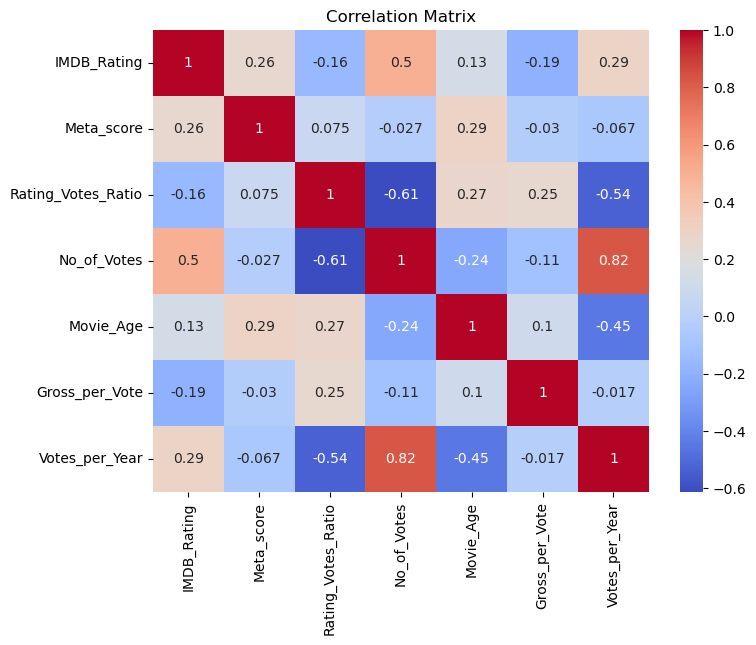

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

features_of_interest = ['IMDB_Rating', 'Meta_score', 'Rating_Votes_Ratio', 'No_of_Votes', 'Movie_Age', 'Gross_per_Vote', 'Votes_per_Year']
corr_matrix = df[features_of_interest].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can observe that there is no strong correlation between any of the features, besides Votes_per_Year and No_of_Votes

In [26]:
from sklearn.tree import DecisionTreeRegressor

features = ['Movie_Age', 'Rating_Votes_Ratio', 'Gross_per_Vote', 'Votes_per_Year', 'Runtime_per_Rating']

x = df[features]
y = df['IMDB_Rating']

dt = DecisionTreeRegressor(random_state=42)
dt.fit(x, y)

importances = pd.Series(dt.feature_importances_, index=features).sort_values(ascending=False)
print(importances)

Rating_Votes_Ratio    0.421785
Movie_Age             0.177869
Gross_per_Vote        0.172258
Runtime_per_Rating    0.117560
Votes_per_Year        0.110529
dtype: float64


As we can see, the Votes_per_Year and Runtime_per_Rating have a negligible importance

**Part 3: Training Regression Models**<br>
We are going to train and evaluate these three regression models:
1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
x = df[features]
y = df['IMDB_Rating']   

imputer = SimpleImputer(strategy='median')
# We are going to use an 80/20 split for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


**Linear Regression** <br>
Step 1: Model Training

In [28]:
from sklearn.linear_model import LinearRegression

x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_imputed, y_train)
y_pred_lr = lr.predict(x_test_imputed)

Step 2: Evaluation <br>
We are going to use metrics such as RMSE, MAE, and R-squared

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(rmse_lr)
print(mae_lr)
print(r2_lr)

0.237716885423385
0.1894630618555564
0.1391548714978561


**Decision Tree Regression** <br>
Step 1: Hyperparameter Tuning

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_dt.fit(x_train_imputed, y_train)
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test_imputed)

Step 2: Evaluation

In [31]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(rmse_dt)
print(mae_dt)
print(r2_dt)

0.2252259232838394
0.1825947156648783
0.2272451934821479


**Random Forest Regression** <br>
Step 1: Hyperparameter tuning

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(x_train_imputed, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test_imputed)

Step 2: Evaluation

In [33]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(rmse_rf)
print(mae_rf)
print(r2_rf)

0.20437976674955388
0.16264907669447431
0.36367239874776014


**Comparing Model Performances** <br>
For the comparison of model performances we are going to create a summary table, and then we will plot some bar charts:

In [34]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'R-Squared': [r2_lr, r2_dt, r2_rf]
})
print(results)

               Model      RMSE       MAE  R-Squared
0  Linear Regression  0.237717  0.189463   0.139155
1      Decision Tree  0.225226  0.182595   0.227245
2      Random Forest  0.204380  0.162649   0.363672


**BAR CHART FOR RMSE**

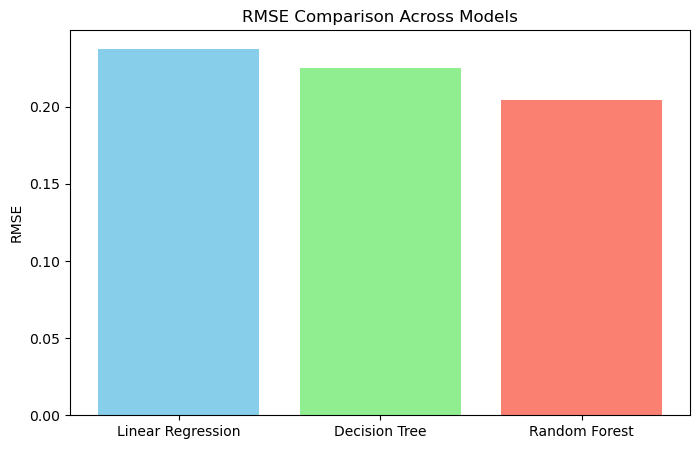

In [36]:
plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['RMSE'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('RMSE Comparison Across Models')
plt.ylabel('RMSE')
plt.show()


**BAR CHART FOR MAE**

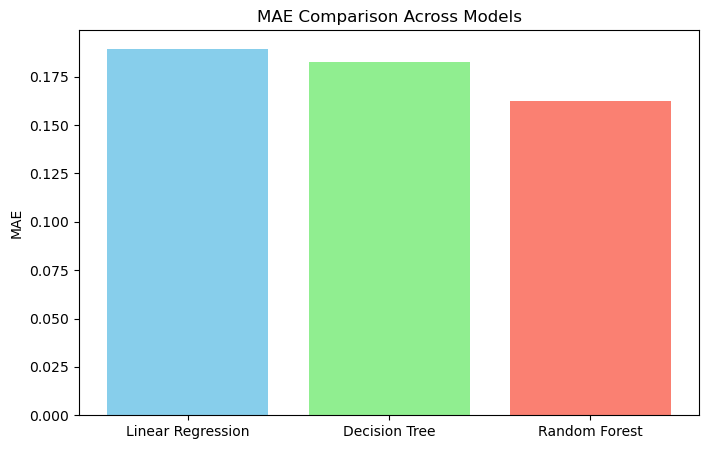

In [37]:
plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['MAE'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('MAE Comparison Across Models')
plt.ylabel('MAE')
plt.show()


**BAR CHART FOR R-SQUARED**

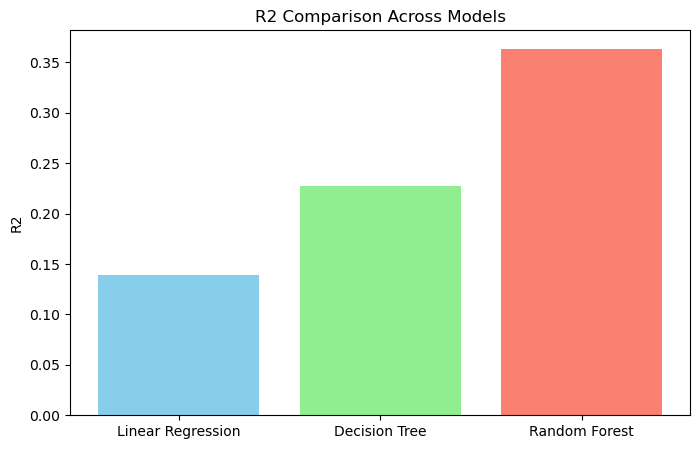

In [38]:
plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['R-Squared'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('R2 Comparison Across Models')
plt.ylabel('R2')
plt.show()


**Part 4: Model Interpretation & Insights** <br>
As we can clearly see from the table and the charts, the Random Forest model outperforms both Linear Regression and Decision Tree. It has the lowest RMSE, MAE and the highest R-Squared. <br>
**Why?** <br>
Random Forest is an ensemble method that combines multiple Decision Trees. Its ensemble nature tends to reduce overfitting compared to a single decision tree, leading to a better performance

**Feature Importance**

When using tree-based models like Decision Tree and Random Forest, we can extract feature importances. Although specific values are not provided in your summary table, here is how you might interpret such results: <br>

**High Feature Importance:** <br>
If features like Rating_Votes_Ratio or Gross_per_Vote show high importance scores, it suggests that these variables are strong predictors of the IMDb rating. For example, a high importance for Rating_Votes_Ratio might indicate that movies with a high rating relative to the number of votes tend to receive higher overall ratings.

**Moderate Importance:** <br>
Features such as Movie_Age might have moderate importance, which can capture generational trends or shifts in movie quality over time.

**Low Importance:** <br>
Features like Runtime_per_Rating or Votes_per_Year (if they were retained) might contribute relatively little explanatory power.

**Interpretation:** <br>
The Random Forest model, by aggregating these importance scores, suggests that non-linear combinations and interactions (such as the balance of rating and votes) are important. This reinforces the idea that movies’ success on IMDb isn’t just a simple linear function—it’s driven by complex interplay among multiple factors.

**Potential Improvements** <br>
Even though Random Forest performs best so far, there are several avenues to potentially improve predictive performance:<br>
**Handling Non-Linearity & Interactions:** <br>
You might add polynomial terms or interactions among features to model non-linear relationships better. <br>
**Hyperparameter Tuning:** <br>
Fine-tune the Random Forest (or any ensemble method) by searching a broader hyperparameter space. Using tools like GridSearchCV or RandomizedSearchCV could yield further gains. <br>
**Feature Transformations:** <br>
If some features are still highly skewed (even after initial engineering), consider additional log, square-root, or Box-Cox transformations to stabilize variance. <br>
**Cross Validation & Robust Evaluation:** <br>
Utilize cross-validation more extensively to ensure that performance gains are consistent and not due to overfitting.